# K-Nearest Neighbor Model
using the wine data set🍷
<br>

In [1]:
#pd.options.mode.chained_assignment = None  # default='warn' (DISPLAY PURPOSES)
from IPython.display import display, HTML

# For Parrallel Computing
from dask.distributed import Client, LocalCluster
from dask import compute, delayed
import dask

cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:50777 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.31 GB


<br>

# Part 1 – Preliminary Tasks (Simple data wrangling) 
### Load Data
some entries are empty so replacing with averages

In [2]:
import knn # custom python file

import pandas as pd
data =  pd.read_csv('winequalityN.csv', index_col=False)
data = knn.data_no_nan(data)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.658078,11.2,6.0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.660000,11.0,6.0


<hr>

# Part 2 – Building and training the kNN model 
### Create Train/Test Data set

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
X = data.loc[:,"fixed acidity":"quality"] # data matrix
y = data.loc[:,"type"] # target vector

#split into train and test
testSize = 0.20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = testSize, stratify=y)

# Reset Index so its all 0 based
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [5]:
print("Train Test Split percentage: " + str(testSize * 100) +  "% test\n")
print("X Training Shape: ", np.shape(X_train))
print("X Test Shape: ", np.shape(X_test))
print("-------------------------------------------------------------------")
print("y Training Shape: ", np.shape(y_train))
print("y Test Shape: ", np.shape(y_test))

Train Test Split percentage: 20.0% test

X Training Shape:  (5197, 12)
X Test Shape:  (1300, 12)
-------------------------------------------------------------------
y Training Shape:  (5197,)
y Test Shape:  (1300,)


### Building the kNN Model

In [6]:
import knn # custom python file
clf = knn.Knn()
clf.fit(X_train,y_train)

Knn(k=3)

<hr>

# Part 3 – Testing the kNN model 


In [7]:
trainingData = pd.concat([X_train, y_train], axis=1)
print('Data instance: ')
display(HTML(pd.DataFrame(trainingData.loc[20,:]).T.to_html()))

Data instance: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
20,11.5,0.31,0.51,2.2,0.079,14,28,0.9982,3.03,0.93,9.8,6,red


In [8]:
X_train.loc[1,"quality"]

5.0

In [9]:
instanceData = trainingData.loc[20,"fixed acidity":"quality"]
prediciton = clf.predict(instanceData)
print("True Class: ", trainingData.loc[20,"type"])
print("Predicited Class: ", prediciton)

True Class:  red
Predicited Class:  red


In [19]:
import knn # custom python file

# search for an optimal value of K for KNN

# list of integers 2 to 25
# integers we want to try
k_range = range(1, 26)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for kH in k_range:
    # 2. run my custom model with k neighbours
    clf = knn.Knn(k=kH)
    clf.fit(X_train,y_train)
    results = {}
    result = []
    # 3. obtain scores my model with k neighbours
    #for j in range(0,np.shape(X_test)[0]):
    #    delayed_results = delayed(clf.predict)(X_test.loc[j,"fixed acidity":"quality"])
    #    result.append(delayed_results)
    #results[k] = dask.compute(*result)
    score = clf.score(X_test,y_test) 
    print("K: ",kH," Score: ", score)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(score)

K:  1  Score:  0.9461538461538461
K:  2  Score:  0.9253846153846154
K:  3  Score:  0.9453846153846154
K:  4  Score:  0.9338461538461539
K:  5  Score:  0.946923076923077
K:  6  Score:  0.9446153846153846
K:  7  Score:  0.9492307692307692
K:  8  Score:  0.9507692307692308
K:  9  Score:  0.9515384615384616
K:  10  Score:  0.9492307692307692
K:  11  Score:  0.9507692307692308
K:  12  Score:  0.9453846153846154
K:  13  Score:  0.9476923076923077
K:  14  Score:  0.9484615384615385
K:  15  Score:  0.9484615384615385
K:  16  Score:  0.946923076923077
K:  17  Score:  0.9446153846153846
K:  18  Score:  0.943076923076923
K:  19  Score:  0.94
K:  20  Score:  0.9407692307692308
K:  21  Score:  0.94
K:  22  Score:  0.94
K:  23  Score:  0.9376923076923077
K:  24  Score:  0.9361538461538461
K:  25  Score:  0.9361538461538461


Best Score: 0.9515
Best K:  [9]


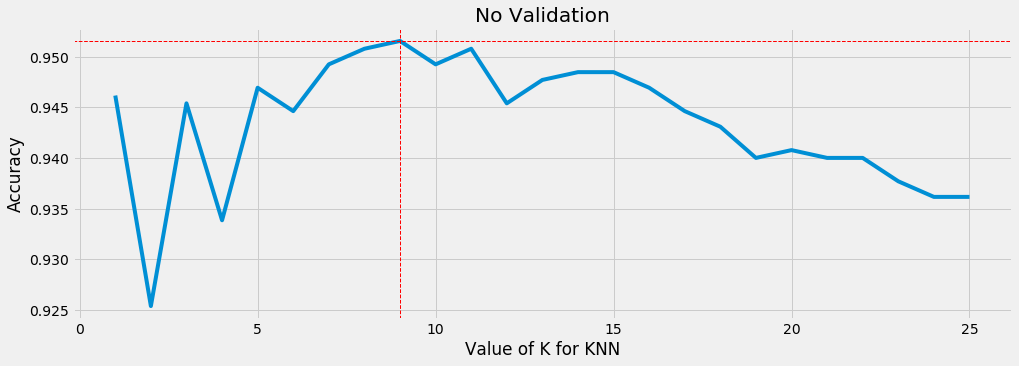

In [20]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('No Validation')

max_value = max(k_scores)  # maximum value
max_keys = np.where(k_scores == np.amax(k_scores))[0]+1 # getting all keys containing the `maximum`

plt.axhline(max_value, color='r', linestyle='--', linewidth=1);
[plt.axvline(_x, linewidth=1, color='r',linestyle='--') for _x in max_keys];
print("Best Score: %.4f" % max_value)
print("Best K: ", max_keys)

<hr>

# Part 4 – Cross validation


In [10]:
from sklearn.model_selection import cross_val_score
import knn # custom python file

# search for an optimal value of K for KNN

# list of integers 1 to 25
# integers we want to try
k_range = range(1, 26)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for kH in k_range:
    # 2. run my custom model with k neighbours
    clf = knn.Knn(k=kH)
    # 3. obtain cross_val_score my model with k neighbours
    scores = cross_val_score(clf, X, y, cv=5)
    print("K: ",kH," Score: ", scores)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

K:  1  Score:  [0.94230769 0.93       0.94149346 0.91762895 0.77290223]
K:  2  Score:  [0.90307692 0.89153846 0.90300231 0.89992302 0.82525019]
K:  3  Score:  [0.94769231 0.94230769 0.93995381 0.91531948 0.74441878]
K:  4  Score:  [0.92538462 0.92384615 0.91685912 0.91147036 0.78983834]
K:  5  Score:  [0.95846154 0.95692308 0.95765974 0.91839877 0.75365666]
K:  6  Score:  [0.94076923 0.94461538 0.94688222 0.91685912 0.77367206]
K:  7  Score:  [0.95307692 0.96615385 0.95842956 0.91685912 0.76212471]
K:  8  Score:  [0.94461538 0.95846154 0.95150115 0.91839877 0.77752117]
K:  9  Score:  [0.96153846 0.97076923 0.96150885 0.91762895 0.76058507]
K:  10  Score:  [0.95923077 0.96461538 0.95612009 0.91839877 0.77444188]
K:  11  Score:  [0.96384615 0.97615385 0.96997691 0.91301001 0.765204  ]
K:  12  Score:  [0.95846154 0.97384615 0.96150885 0.91224018 0.77444188]
K:  13  Score:  [0.96307692 0.97692308 0.96535797 0.91454965 0.7582756 ]
K:  14  Score:  [0.95615385 0.97307692 0.9630485  0.91301001

Best Score: 0.9176
Best K:  [11]


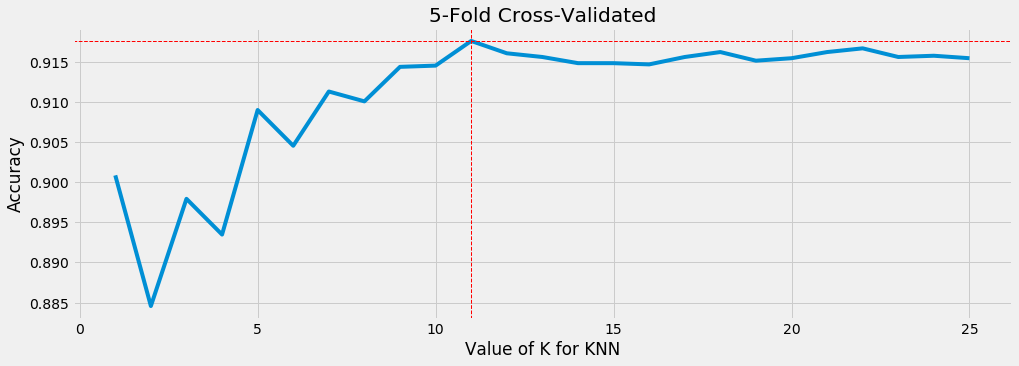

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validated')

max_value = max(k_scores)  # maximum value
max_keys = np.where(k_scores == np.amax(k_scores))[0]+1 # getting all keys containing the `maximum`

plt.axhline(max_value, color='r', linestyle='--', linewidth=1);
[plt.axvline(_x, linewidth=1, color='r',linestyle='--') for _x in max_keys];
print("Best Score: %.4f" % max_value)
print("Best K: ", max_keys)

# Part 5 - Optimizing n-neighbor parameter

In [12]:
from sklearn.model_selection  import GridSearchCV

In [13]:
param_grid = dict(k=k_range)
print(param_grid)

{'k': range(1, 26)}


In [14]:
grid = GridSearchCV(clf, param_grid, cv=10)

In [15]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan, estimator=Knn(k=25), iid='deprecated',
             n_jobs=None, param_grid={'k': range(1, 26)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.9306907668602584
{'k': 13}


In [17]:
pd.DataFrame(grid.cv_results_, index=k_range)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.012194,0.007137,145.959871,0.661277,1,{'k': 1},0.963077,0.940000,0.940000,0.952308,0.944615,0.947692,0.952308,0.873652,0.856703,0.827427,0.919778,0.045651,23
2,0.015118,0.008250,146.113404,0.626792,2,{'k': 2},0.930769,0.901538,0.923077,0.912308,0.926154,0.915385,0.906154,0.882897,0.884438,0.885978,0.906870,0.016885,25
3,0.010698,0.006064,145.629034,0.410074,3,{'k': 3},0.960000,0.949231,0.944615,0.958462,0.953846,0.950769,0.966154,0.864407,0.824345,0.844376,0.921620,0.051668,21
4,0.007149,0.003001,145.943097,0.571277,4,{'k': 4},0.938462,0.923077,0.935385,0.943077,0.936923,0.932308,0.946154,0.879815,0.859784,0.865948,0.916093,0.032018,24
5,0.010821,0.005059,145.720607,0.635463,5,{'k': 5},0.966154,0.961538,0.964615,0.969231,0.961538,0.961538,0.973846,0.861325,0.810478,0.828968,0.925923,0.061639,18
6,0.012394,0.004716,149.432469,4.186962,6,{'k': 6},0.960000,0.944615,0.949231,0.960000,0.953846,0.950769,0.961538,0.865948,0.819723,0.844376,0.921005,0.052119,22
7,0.016793,0.012901,181.038128,18.879334,7,{'k': 7},0.975385,0.953846,0.969231,0.973846,0.961538,0.964615,0.972308,0.859784,0.793529,0.828968,0.925305,0.066041,19
8,0.019090,0.026917,165.405074,21.522480,8,{'k': 8},0.966154,0.946154,0.966154,0.966154,0.958462,0.960000,0.964615,0.869029,0.807396,0.845917,0.925003,0.057149,20
9,0.009695,0.006179,158.215616,9.282849,9,{'k': 9},0.983077,0.960000,0.972308,0.981538,0.969231,0.966154,0.970769,0.858243,0.798151,0.827427,0.928690,0.067608,15
10,0.010697,0.004647,150.221248,0.819576,10,{'k': 10},0.975385,0.953846,0.969231,0.973846,0.960000,0.960000,0.970769,0.862866,0.812018,0.842835,0.928080,0.059615,17


Best Score: 0.9307
Best K:  [13]


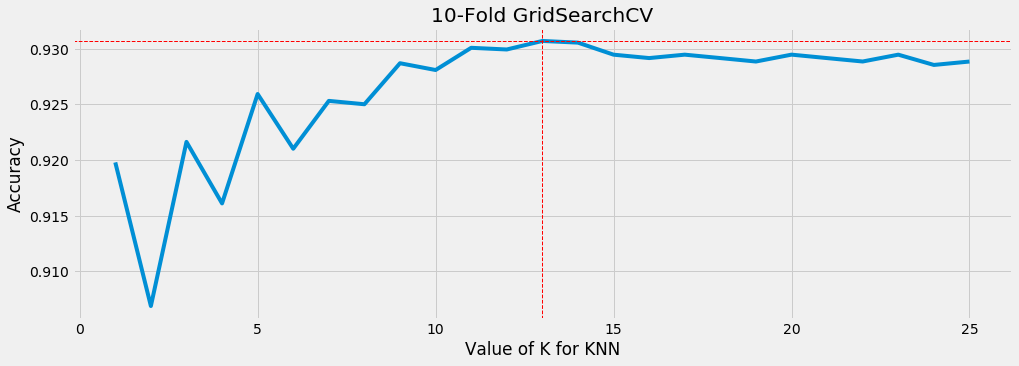

In [18]:
plt.figure(figsize=(15,5))

grid_mean_scores = grid.cv_results_['mean_test_score']
max_value = max(grid_mean_scores)  # maximum value
max_keys = np.where(grid_mean_scores == np.amax(grid_mean_scores))[0]+1 # getting all keys containing the `maximum`

plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy');
plt.title('10-Fold GridSearchCV')

plt.axhline(max_value, color='r', linestyle='--', linewidth=1);
[plt.axvline(_x, linewidth=1, color='r',linestyle='--') for _x in max_keys];

print("Best Score: %.4f" % max_value)
print("Best K: ", max_keys)

<hr>

# EXTRA - SCIKIT Learn
### 1 - Use knn.score() to see the accuracy

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# split into test and train dataset, and use random_state=48
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [ ]:
# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
# train the model
knn.fit(X_train, y_train)

In [ ]:
# get the predict value from X_test
y_pred = knn.predict(X_test)
print(y_pred)

In [ ]:
# print the score
print('accuracy: ', knn.score(X_test, y_test))

In [ ]:
# choose k between 1 to 31
k_range = range(1, 31)

k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    # build KNN model and choose n_neighbors
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', n_jobs=-1)
    # train the model
    knn.fit(X_train, y_train)
    # Append Scores
    k_scores.append(knn.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

plt.bar(k_range, k_scores, 0.5, color='g', edgecolor='k')

#highlight bar that is max
max_value = max(k_scores)
max_keys = [i for i, j in enumerate(k_scores) if j == max_value] # getting all keys containing the `maximum`

plt.bar(max_keys, max_value, 0.5, color='b', edgecolor='k');
plt.axhline(max_value, color='b', linestyle='--', linewidth=1)

plt.xticks(np.arange(1, max(k_range)+1, 1));
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy');

### 2 - Cross-Validation for Classification

In [ ]:
from sklearn.model_selection import cross_val_score

# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# print all 5 times scores 
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

### we could choose differenct neighbors to see which K is the best K.


In [ ]:
# choose k between 1 to 31
k_range = range(1, 31)

k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', n_jobs=-1)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

plt.bar(k_range, k_scores, 0.5, color='g', edgecolor='k')

#highlight bar that is max
max_value = max(k_scores)
max_keys = [i for i, j in enumerate(k_scores) if j == max_value] # getting all keys containing the `maximum`

plt.bar(max_keys, max_value, 0.5, color='b', edgecolor='k');
plt.axhline(max_value, color='b', linestyle='--', linewidth=1)

plt.xticks(np.arange(1, max(k_range)+1, 1));
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');